#this notebook is an example of how to open the preprocessed data and show it

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

base_directory = r"/home/k21208334/calcium_analyses/data/NXAK22.1A/"

In [3]:
# Load SVT
svt = np.load(os.path.join(base_directory,"Corrected_SVT.npy"))
u = np.load(os.path.join(base_directory,"U.npy"))
print(np.shape(svt))
print(np.shape(u))

toshow = 1000; #i show only a subset of timepoints
window_size = 50 # this is window size for sliding window correlation!
sample = np.dot(u, svt[:, 0:toshow])
print(np.shape(sample))

(200, 25498)
(300, 304, 200)
(300, 304, 1000)


In [4]:
subsample = block_reduce(sample, block_size=(6, 6, 1), func=np.mean)

In [5]:
# compute time varying connectivity: flatten data

signals = np.reshape(subsample,(np.shape(subsample)[0]*np.shape(subsample)[1],toshow))
np.shape(signals)
# remove zero signals
power = np.std(signals,axis=1) #standard dev of signal. I'll discard zero std
signals = signals[power!=0,:]


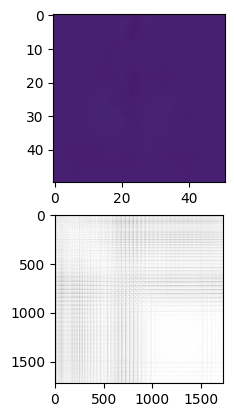

<Figure size 640x480 with 0 Axes>

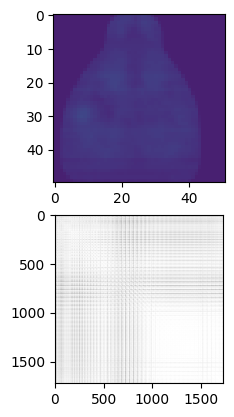

<Figure size 640x480 with 0 Axes>

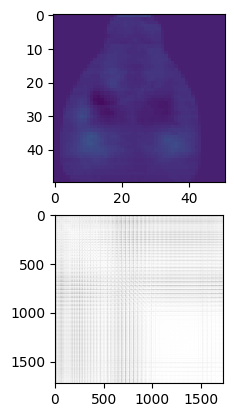

<Figure size 640x480 with 0 Axes>

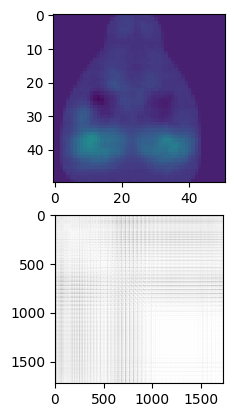

<Figure size 640x480 with 0 Axes>

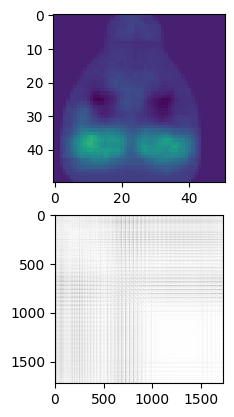

<Figure size 640x480 with 0 Axes>

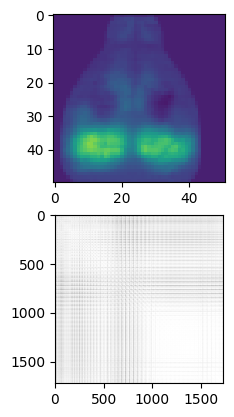

<Figure size 640x480 with 0 Axes>

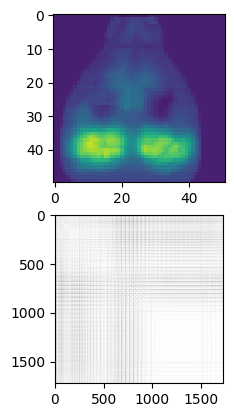

<Figure size 640x480 with 0 Axes>

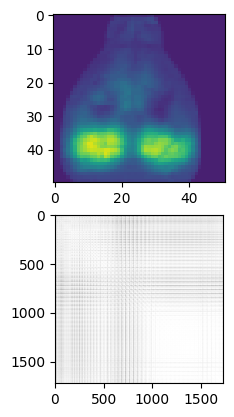

<Figure size 640x480 with 0 Axes>

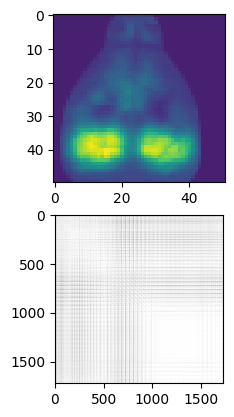

<Figure size 640x480 with 0 Axes>

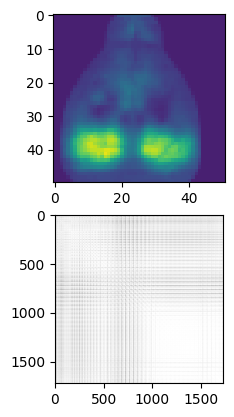

<Figure size 640x480 with 0 Axes>

In [66]:
plt.ion()

for x in range(toshow):
    left = int(max(x-window_size/2,0))
    right = int(min(x+window_size/2,toshow))
    fig, axs = plt.subplots(2)
    axs[0].imshow(subsample[:, :, x],cmap="viridis",vmin=np.min(subsample),vmax=np.max(subsample))
    axs[1].imshow(np.corrcoef(signals[:,left:right]),cmap="gray",vmin = -1,vmax = 1)
    plt.draw()
    plt.pause(0.1)
    plt.clf()

In [11]:
int(max(56-(window_size/2),0))

31